In [1]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 14.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 20.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 16.6 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_A_events = pd.read_csv('../datasets/df_A_events.csv')
df_B_events = pd.read_csv('../datasets/df_B_events.csv')
df_C_events = pd.read_csv('../datasets/df_C_events.csv')
df_D_events = pd.read_csv('../datasets/df_D_events.csv')

csvs = [df_A_events, df_B_events, df_C_events, df_D_events]

In [4]:
for df in csvs:
    #TIME FEATURES
    df['Start time'] = pd.to_datetime(df['Start time'])
    df['End time'] = pd.to_datetime(df['End time'])
    df['Hour'] = df['Start time'].dt.hour
    df['Hour sin'] = np.sin(df['Hour'] * (2. * np.pi / 24))
    df['Hour cos'] = np.cos(df['Hour'] * (2. * np.pi / 24))
    df['Day of Week'] = df['Start time'].dt.dayofweek
    df['Duration'] = (df['End time'] - df['Start time']).dt.total_seconds()
    #events under 1 second would be 0 duration, so we set them to 0.5
    df.loc[df['Duration'] == 0, 'Duration'] = 0.5

    #DERIVED FEATURES
    df['Packet Rate'] = df['Packet speed'] / df['Duration']
    df['Data Rate'] = df['Data speed'] / df['Duration']
    df['Packet Size to Speed Ratio'] = df['Avg packet len'] / df['Packet speed']
    df['Data to Packet Ratio'] = df['Data speed'] / df['Packet speed']  

    #NORMALIZE
    df['Packet speed'] = (df['Packet speed'] - df['Packet speed'].min()) / (df['Packet speed'].max() - df['Packet speed'].min())
    df['Data speed'] = (df['Data speed'] - df['Data speed'].min()) / (df['Data speed'].max() - df['Data speed'].min())


feature_cols = ['Packet speed', 'Data speed', 'Packet Rate', 'Data Rate', 'Packet Size to Speed Ratio', 'Data to Packet Ratio','Duration', 'Hour sin', 'Hour cos', 'Day of Week']


 

In [5]:
df_A_events[feature_cols].head()

,Packet speed,Data speed,Packet Rate,Data Rate,Packet Size to Speed Ratio,Data to Packet Ratio,Duration,Hour sin,Hour cos,Day of Week
0,0.012829,0.035732,55600.000000,73.000000,0.024874,0.001313,1.0,-1.0,-1.836970e-16,0
1,0.015076,0.044053,127000.000000,180.000000,0.023717,0.001417,0.5,-1.0,-1.836970e-16,0
2,0.014848,0.040137,62700.000000,82.000000,0.022313,0.001308,1.0,-1.0,-1.836970e-16,0
3,0.013938,0.041605,59500.000000,85.000000,0.024975,0.001429,1.0,-1.0,-1.836970e-16,0
4,0.019272,0.055311,1397.321429,2.017857,0.019399,0.001444,56.0,-1.0,-1.836970e-16,0


In [6]:
df_A_components = pd.read_csv('../datasets/df_A_components.csv')
df_B_components = pd.read_csv('../datasets/df_B_components.csv')
df_C_components = pd.read_csv('../datasets/df_C_components.csv')
df_D_components = pd.read_csv('../datasets/df_D_components.csv')

comp_csvs = [df_A_components, df_B_components, df_C_components, df_D_components]

In [7]:
for df, df_comp in zip(csvs, comp_csvs):
    unique_ports = df_comp.groupby('Attack ID')['Port number'].nunique()
    df['Unique ports']=df_comp['Attack ID'].map(unique_ports)
    
    std_packet_speed = df_comp.groupby('Attack ID')['Packet speed'].std(ddof=0)
    df['Std packet speed']=df_comp['Attack ID'].map(std_packet_speed)
    max_packet_speed = df_comp.groupby('Attack ID')['Packet speed'].max()
    df['Max packet speed']=df_comp['Attack ID'].map(max_packet_speed)
    
    std_data_speed = df_comp.groupby('Attack ID')['Data speed'].std(ddof=0)
    df['Std data speed']=df_comp['Attack ID'].map(std_data_speed)
    max_data_speed = df_comp.groupby('Attack ID')['Data speed'].max()
    df['Max data speed']=df_comp['Attack ID'].map(max_data_speed)
    
    std_packet_length = df_comp.groupby('Attack ID')['Avg packet len'].std(ddof=0)
    df['Std packet length']=df_comp['Attack ID'].map(std_packet_length)
    max_packet_length = df_comp.groupby('Attack ID')['Avg packet len'].max()
    df['Max packet length']=df_comp['Attack ID'].map(max_packet_length)

    std_source_ip_count= df_comp.groupby('Attack ID')['Source IP count'].std(ddof=0)
    df['Std source IP count']=df_comp['Attack ID'].map(std_source_ip_count)
    max_source_ip_count = df_comp.groupby('Attack ID')['Source IP count'].max()
    df['Max source IP count']=df_comp['Attack ID'].map(max_source_ip_count)

    df_comp['Time']=pd.to_datetime(df_comp['Time'])
    df_comp = df_comp.sort_values(by=["Attack ID", "Time"])
    df_comp["Time diff"] = df_comp.groupby("Attack ID")["Time"].diff().dt.total_seconds().fillna(0)
    time_diff_mean = df_comp.groupby("Attack ID")["Time diff"].mean()
    time_diff_std = df_comp.groupby("Attack ID")["Time diff"].std(ddof=0)
    df['Mean time diff'] = df_comp['Attack ID'].map(time_diff_mean)
    df['Std time diff'] = df_comp['Attack ID'].map(time_diff_std)

In [8]:
df_A_events.head()

,Unnamed: 0,Attack ID,Victim IP,Port number,Detect count,Packet speed,Data speed,Avg packet len,Avg source IP count,Start time,...,Std packet speed,Max packet speed,Std data speed,Max data speed,Std packet length,Max packet length,Std source IP count,Max source IP count,Mean time diff,Std time diff
0,0,1,IP_0001,4500,1,0.012829,0.035732,1383,6,2022-08-08 18:09:36,...,0.0,55600,0.0,73,0.0,1383,0.0,6,0.0,0.0
1,1,2,IP_0002,4500,1,0.015076,0.044053,1506,1,2022-08-08 18:37:28,...,0.0,63500,0.0,90,0.0,1506,0.0,1,0.0,0.0
2,2,3,IP_0003,1200,2,0.014848,0.040137,1399,1,2022-08-08 18:41:25,...,3000.0,65700,3.5,86,0.0,1399,0.0,1,0.5,0.5
3,3,4,IP_0002,4500,1,0.013938,0.041605,1486,1,2022-08-08 18:47:49,...,3000.0,65700,3.5,86,0.0,1399,0.0,1,0.5,0.5
4,4,5,IP_0004,12347,2,0.019272,0.055311,1518,1,2022-08-08 18:57:15,...,0.0,59500,0.0,85,0.0,1486,0.0,1,0.0,0.0


In [9]:
df_A_events['Unique ports'].value_counts()

Unique ports
1     66989
2     36704
3     10239
50     5300
4      3827
23     3226
5      2941
6      2484
54     1845
13      557
7       414
12      123
8       117
Name: count, dtype: int64

In [10]:
from umap.umap_ import UMAP
from sklearn.decomposition import PCA

mymap = UMAP(random_state=42, n_components=2, n_neighbors=15) # jó ötletnek tűnt, de aztán meghalt a gépem
pca = PCA(n_components=2,random_state=42)

for df in csvs:
    #df['umap_1']=0
    #df['umap_2']=0
    #df[['umap_1','umap_2']]=mymap.fit_transform(df[feature_cols])       
    df['pca_1']=0
    df['pca_2']=0
    df[['pca_1','pca_2']]=pca.fit_transform(df[feature_cols])

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Tesztelés

In [11]:
!pip install -U scikit-learn
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [12]:
A_X = df_A_events[feature_cols]
A_y = df_A_events['Type']
X_train, X_test, y_train, y_test = train_test_split(A_X, A_y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 93.17%
[[  131    47    20]
 [    8 24486   334]
 [    4  1428   496]]


In [13]:
feature_cols += ['Unique ports', 'Std packet speed', 'Max packet speed', 'Std data speed', 'Max data speed', 'Std packet length', 'Max packet length',
                  'Std source IP count', 'Max source IP count', 'Mean time diff', 'Std time diff']

In [14]:
A_X = df_A_events[feature_cols]
A_y = df_A_events['Type']
X_train, X_test, y_train, y_test = train_test_split(A_X, A_y, test_size=0.2, random_state=42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 94.13%
[[  131    44    23]
 [    3 24539   286]
 [    4  1223   701]]


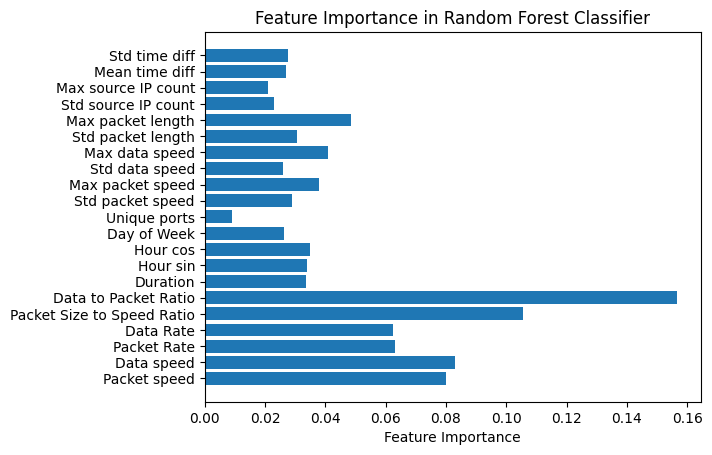

In [15]:
feature_importances = classifier.feature_importances_
plt.barh(feature_cols, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [16]:
feature_cols += ['pca_1','pca_2']

In [17]:
A_X = df_A_events[feature_cols]
A_y = df_A_events['Type']
X_train, X_test, y_train, y_test = train_test_split(A_X, A_y, test_size=0.2, random_state=42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 94.10%
[[  128    44    26]
 [    5 24554   269]
 [    4  1241   683]]


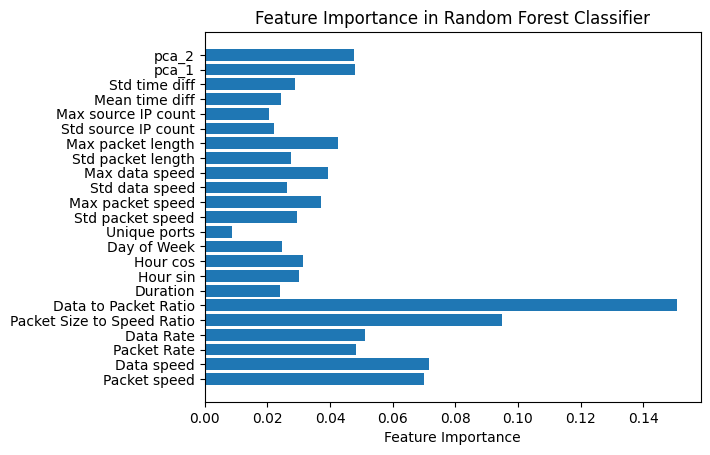

In [18]:
feature_importances = classifier.feature_importances_
plt.barh(feature_cols, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()